## Manipulating Images in Python

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

### The Python Image Library (PIL)

In [2]:
from PIL import Image

### You can load images as `Image` instances

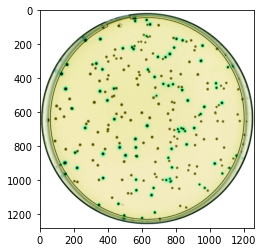

In [3]:
img = Image.open("img/colonies.jpg")
plt.imshow(img)

### `Image` instances can be interconverted with `numpy` arrays

In [4]:
arr = np.array(img)
print("x,y,RGB ->",arr.shape)

x,y,RGB -> (1280, 1261, 3)


### Values are represented for different channels in bits
+ 8-bit channels have $2^8 = 256$ possible values. 
+ 16-bit channels have $2^{16} = 65,6536$ possible values 

### Major formats you'll encounter

+ 8-bit grayscale (1 channel, 0-255). 
+ 8-bit color (3 channels, each 0-255)
+ 8-bit RGBA (4 channels, each 0-255)
+ 16-bit grayscale (1 channel, 0-65535)
+ 16-bit color (3 channels, each 0-65535)
+ 16-bit RGBA (4 channels, each 0-65535)

By convention, channels are arranged:
Red, Green, Blue, Transparency

#### What kind of image did we just read in?

<span style="color:blue">8-bit color</span> (3 channels with 256 possible values)

#### What does the following code do?

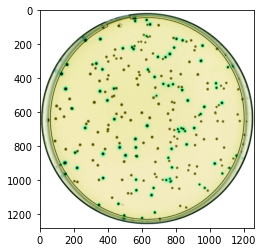

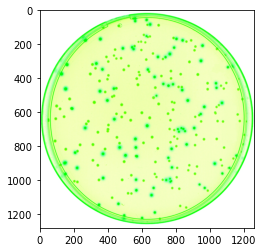

In [5]:
arr = np.array(img)
plt.imshow(arr)
plt.show()
arr[:,:,1] = 255

plt.imshow(arr)

Sets the *Green* channel to 255, leaving the other channels alone.

#### Can convert arrays back to images and save

In [6]:
x = Image.fromarray(arr)
x.save('junk.png')

### One powerful method is to create a *mask*

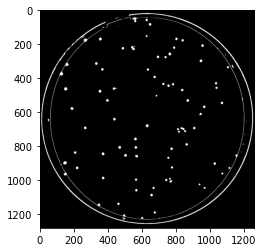

In [7]:
arr = np.array(img)
low_red = arr[:,:,0] < 50 

arr[:,:,0] = low_red*255
arr[:,:,1] = low_red*255
arr[:,:,2] = low_red*255

plt.show()
plt.imshow(arr)

### You can combine masks with "*" (and) and "+" (or)

Predict the output of the next cell.

In [8]:
print("True and True =", bool(True*True))
print("False and True =", bool(False*True))
print("Flase and False =",bool(False*False))

print("True or False =",bool(True + False))
print("True or True =",bool(True + True))
print("False or False =",bool(False + False))


True and True = True
False and True = False
Flase and False = False
True or False = True
True or True = True
False or False = False


### Combined mask

What will the following code do?

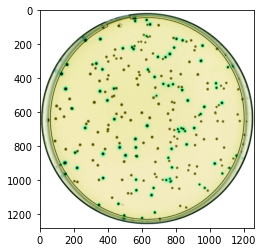

In [9]:
arr = np.array(img)

red = arr[:,:,0] < 2
green = arr[:,:,1] > 5
blue = arr[:,:,2] < 5
mask = red*green*blue

new_arr = np.zeros(arr.shape,dtype=arr.dtype)
new_arr[:,:,1] = mask*255

plt.imshow(img)


### Find pixels with some green but little red or blue, then set those to green.  All other pixels are black.

Write a block of code that reads in the image, sets any pixel with red > 20 to (0,0,0), and then writes out a new .png image.

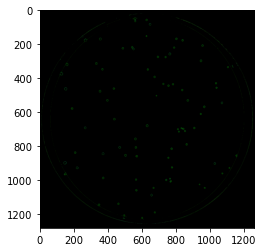

In [10]:
img = Image.open("img/colonies.jpg")
arr = np.array(img)
mask = arr[:,:,0] > 20

arr[mask,0] = 0
arr[mask,1] = 0
arr[mask,2] = 0

plt.imshow(arr)
img2 = Image.fromarray(arr)
img2.save("junk.png")
